<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="500" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> Bank Marketing Classification - Optional Exercise Solution </h1>

<hr />
<center>Constructor Academy, 2024</center>

In [1]:
!pip install imblearn --ignore-installed

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 27.1 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 79.4 MB/s eta 0:00:00ta 0:00:01
Using cached scipy-1.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)


In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

__Lodaing data__

In [3]:
orig_url = "https://drive.google.com/file/d/18ChIRH2micwKWggrIgbhRe3BkAExFidX/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(dwn_url)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


__Train and test split__

In [4]:
X = df.iloc[:,:-1]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [5]:
y_train.value_counts()

y
0    29256
1     3694
Name: count, dtype: int64

__Resampling RandomUnderSampler__

In [6]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [7]:
pd.Series(y_train_rus).value_counts()

y
0    3694
1    3694
Name: count, dtype: int64

__Pipeline__

<span style="color:orange"> **Before running our Models, we first want to prepare our data.**</span> <br>

<span style="color:green"> **Categorical data:** One hot encoding</span> <br>
<span style="color:green"> **Continuous:** Standard scaling</span> 

<span style="color:orange"> **We then put everything together using the build in sklearn function called ColumnTransformer**</span>

__Column transformer__

In [8]:
categorical_features = df.iloc[:, list(np.where(X.dtypes == "object")[0])].columns
continious_features = df.iloc[:, list(np.where(X.dtypes == "int")[0])].columns
categorical_features, continious_features

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome'],
       dtype='object'),
 Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))

In [9]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers = [("num", numeric_transformer, continious_features),
                    ("cat", categorical_transformer, categorical_features)])

<span style="color:orange"> **Let's run different models and evaluate them.**</span>

__KNN__

In [10]:
from sklearn.neighbors import KNeighborsClassifier

scores = []

knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [11]:
pipeline_knn = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", knn)])

In [12]:
pipeline_knn.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('estimator', KNeighborsClassifier())])

In [13]:
pred_knn = pipeline_knn.predict(X_test)
scores.append(f1_score(y_test, pred_knn))


In [14]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      7292
           1       0.38      0.75      0.50       946

    accuracy                           0.83      8238
   macro avg       0.67      0.80      0.70      8238
weighted avg       0.90      0.83      0.85      8238



__Naive Bayes__

In [15]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()

pipeline_nb = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", nb)])


In [16]:

pipeline_nb.fit(X_train_rus, y_train_rus)

pred_nb = pipeline_nb.predict(X_test)
scores.append(f1_score(y_test, pred_nb))

In [17]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.81      0.87      7292
           1       0.32      0.71      0.44       946

    accuracy                           0.80      8238
   macro avg       0.64      0.76      0.66      8238
weighted avg       0.88      0.80      0.83      8238



__SVM__

In [18]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=2000)

pipeline_svm = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", svm)])

In [19]:
pipeline_svm.fit(X_train_rus, y_train_rus)

pred_svm = pipeline_svm.predict(X_test)
scores.append(f1_score(y_test, pred_svm))

In [20]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7292
           1       0.44      0.82      0.57       946

    accuracy                           0.86      8238
   macro avg       0.70      0.84      0.74      8238
weighted avg       0.91      0.86      0.87      8238



__RandomForestClassifier__

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, random_state=42)

pipeline_rfc = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", rfc)])

In [22]:
pipeline_rfc.fit(X_train_rus, y_train_rus)

pred_rfc = pipeline_rfc.predict(X_test)
scores.append(f1_score(y_test, pred_rfc))

In [23]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.84      0.90      7292
           1       0.42      0.90      0.57       946

    accuracy                           0.84      8238
   macro avg       0.70      0.87      0.74      8238
weighted avg       0.92      0.84      0.87      8238



__AdaBoost__

In [24]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

pipeline_ada = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", ada)])

In [25]:

pipeline_ada.fit(X_train_rus, y_train_rus)

pred_ada = pipeline_ada.predict(X_test)
scores.append(f1_score(y_test, pred_ada))

/home/constructor/.conda/envs/MLG/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [26]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7292
           1       0.41      0.82      0.55       946

    accuracy                           0.84      8238
   macro avg       0.69      0.83      0.73      8238
weighted avg       0.91      0.84      0.86      8238



In [27]:
from sklearn.tree import DecisionTreeClassifier

ada2 = AdaBoostClassifier(n_estimators=100,
                          estimator=DecisionTreeClassifier(max_depth=8, 
                                                                random_state=42), 
                          random_state=42)
pipeline_ada2 = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", ada2)])
pipeline_ada2.fit(X_train_rus, y_train_rus)
pred_ada = pipeline_ada2.predict(X_test)
print(classification_report(y_test, pred_ada))

/home/constructor/.conda/envs/MLG/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7292
           1       0.39      0.87      0.54       946

    accuracy                           0.83      8238
   macro avg       0.69      0.85      0.72      8238
weighted avg       0.91      0.83      0.86      8238



__XGBoost__

In [28]:
!pip install xgboost

In [29]:
from xgboost import XGBClassifier, plot_importance

xgb = XGBClassifier()

pipeline_xgb = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", xgb)])

In [30]:

pipeline_xgb.fit(X_train_rus, y_train_rus)

pred_xgb = pipeline_xgb.predict(X_test)
scores.append(f1_score(y_test, pred_xgb))

In [31]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7292
           1       0.42      0.89      0.57       946

    accuracy                           0.84      8238
   macro avg       0.70      0.86      0.74      8238
weighted avg       0.92      0.84      0.87      8238



### Compare model performance

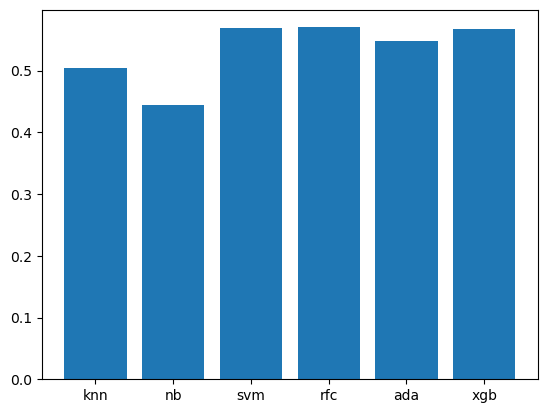

In [32]:
models = ["knn", "nb", "svm", "rfc","ada","xgb"]
plt.bar(models, scores);

In [33]:
models

['knn', 'nb', 'svm', 'rfc', 'ada', 'xgb']

In [34]:
scores

[0.5048059807760769,
 0.4440778620917189,
 0.5688073394495413,
 0.570286475682878,
 0.547635850388144,
 0.5668918918918919]

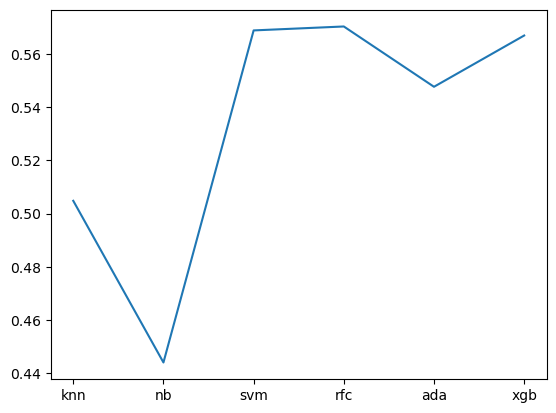

In [35]:
plt.plot(models,scores);

### Feature Importance 

Trees based models like RandomForest, XGBoost, etc.  provide us feature importance based on the training.

In [36]:
pipeline_rfc

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(n_estimators=500, random_state=42))])

In [37]:
rfc_model = pipeline_rfc['estimator']
rfc_model

RandomForestClassifier(n_estimators=500, random_state=42)

In [38]:
pipeline_rfc['col_transformer'].transformers_

[('num',
  Pipeline(steps=[('scaler', StandardScaler())]),
  Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
 ('cat',
  Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
         'month', 'day_of_week', 'poutcome'],
        dtype='object')),
 ('remainder', 'drop', [15, 16, 17, 18, 19])]

In [39]:
num_feat = list(pipeline_rfc['col_transformer'].transformers_[0][2])
cat_feat = list(pipeline_rfc['col_transformer'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features))

In [40]:
feature_columns = num_feat+cat_feat
feature_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'pou

In [41]:
rfc_model.feature_importances_

array([8.68824664e-02, 3.55761320e-01, 3.97206822e-02, 3.30589997e-02,
       1.86403734e-02, 1.06862701e-02, 9.30979657e-03, 3.82869422e-03,
       3.13232592e-03, 6.16254764e-03, 6.71773012e-03, 4.32718460e-03,
       6.88706261e-03, 6.66226931e-03, 9.18551378e-03, 3.46264440e-03,
       1.45786869e-03, 6.52966347e-03, 1.05220434e-02, 1.04457053e-02,
       1.66006530e-04, 6.00374008e-03, 3.71951074e-03, 7.48790246e-03,
       1.01542545e-02, 2.36888416e-04, 7.61321264e-03, 1.15848625e-02,
       4.42889467e-03, 8.90891832e-03, 9.20058076e-03, 1.18576310e-02,
       1.93160090e-03, 1.17709180e-02, 8.30132479e-03, 1.82778314e-03,
       7.74647173e-03, 1.73785437e-02, 1.65391812e-02, 1.30534719e-02,
       9.84519026e-03, 2.47463396e-03, 1.12941986e-02, 1.49733947e-02,
       1.70960932e-02, 1.77349446e-02, 1.02005515e-02, 1.23535621e-02,
       7.38583953e-03, 1.09061125e-02, 1.15538963e-02, 1.13907568e-02,
       1.07021752e-02, 1.06513216e-02, 6.30671849e-03, 1.62226745e-02,
      

In [42]:
rfc_importances = pd.DataFrame(
    {"feature": feature_columns, "importance": np.round(rfc.feature_importances_, 3)}
)
rfc_importances = rfc_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
rfc_importances

,importance
feature,
duration,0.356
age,0.087
campaign,0.040
pdays,0.033
poutcome_success,0.026
previous,0.019
month_may,0.018
contact_telephone,0.017
contact_cellular,0.017


In [43]:
# rfc_importances

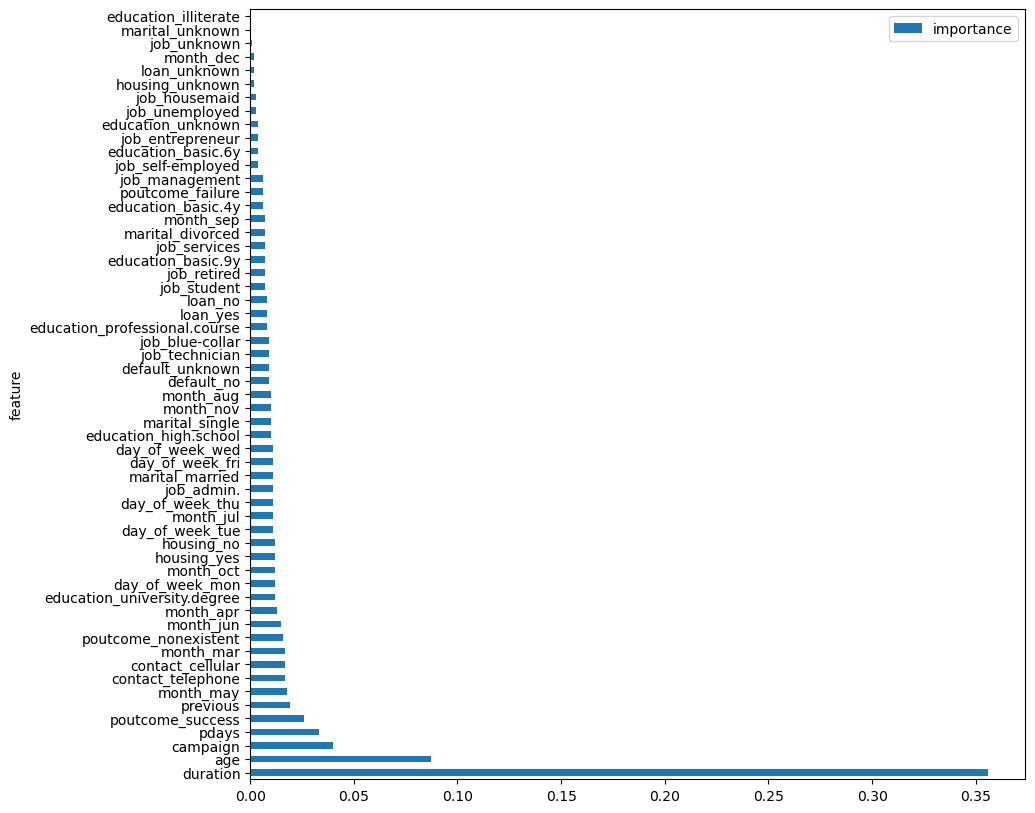

In [44]:
f,ax = plt.subplots(figsize=(10,10)) 
rfc_importances.plot(kind="barh",ax=ax);